# Home Price Model Project Part 1

### Read the data 'train.csv' and 'test.csv'

In [3]:
import pandas as pd
import numpy as np
train_data=pd.read_csv('data/train.csv')
test_data=pd.read_csv('data/test.csv')

### Explore the data

- Check the shape of train and test data

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- Now we will be focusing on the training set

In [5]:
test_data.shape

(1459, 80)

- Look into column types, filter out numerical variables and categorical variables. How many features are numerical and how many are categorical?

In [6]:
num_df=train_data.select_dtypes(include=np.number)
num_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [7]:
train_data.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

#### First we perform analysis on numerical variables 

- Remove Id column

In [8]:
num_df=num_df.drop(columns=['Id'])

- Check the distribution of SalePrice with Histogram

<AxesSubplot:>

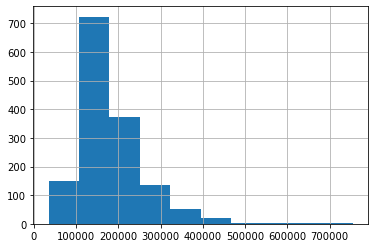

In [9]:
num_df['SalePrice'].hist()

- Is the distribution close to normal? If not, how do we normalize it? And show the result.

<AxesSubplot:>

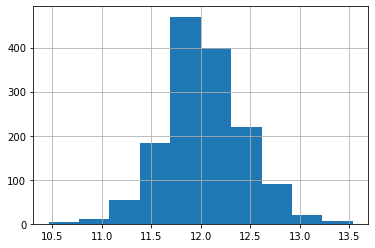

In [10]:
num_df['LogSalePrice']=np.log(num_df['SalePrice'])
num_df['LogSalePrice'].hist()

- List of features with missing values, and the percentage of missing

In [11]:
(num_df.isnull().sum()/len(num_df)*100).sort_values(ascending=False)

LotFrontage      17.739726
GarageYrBlt       5.547945
MasVnrArea        0.547945
OpenPorchSF       0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
MSSubClass        0.000000
BedroomAbvGr      0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SalePrice         0.000000
EnclosedPorch     0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtFinSF2        0.000000
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
BsmtFinSF1        0.000000
BsmtUnfSF         0.000000
BsmtHalfBath      0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
L

- Try filling the missing values

In [12]:
num_df=num_df.fillna(0)
num_df.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
LogSalePrice     0
dtype: int64

- Calculate correlation between SalePrice and all numerical variables, and sort them

In [13]:
(num_df.corr().abs()['SalePrice']).sort_values(ascending=False)

SalePrice        1.000000
LogSalePrice     0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

- Pick variables with abs of correlation greater than 0.2 and Create correlation matrix for all numerical variables

In [16]:
highcorr_num_df=num_df.loc[:,num_df.corr().abs()['SalePrice']>0.2]
highcorr_num_df.corr().abs()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,LogSalePrice
LotFrontage,1.000000,0.100739,0.176561,0.036853,0.078686,0.105010,0.076670,0.160829,0.238274,0.245181,...,0.012952,0.221396,0.044018,0.019317,0.165229,0.201473,0.016780,0.069605,0.209624,0.179303
LotArea,0.100739,1.000000,0.105806,0.014228,0.013788,0.103321,0.214103,0.002618,0.260833,0.299475,...,0.014259,0.190015,0.271364,0.072599,0.154871,0.180403,0.171698,0.084774,0.263843,0.257320
OverallQual,0.176561,0.105806,1.000000,0.572323,0.550684,0.407252,0.239666,0.308159,0.537808,0.476224,...,0.273458,0.427452,0.396765,0.288998,0.600671,0.562022,0.238923,0.308819,0.790982,0.817184
YearBuilt,0.036853,0.014228,0.572323,1.000000,0.592855,0.311600,0.249503,0.149040,0.391452,0.281986,...,0.242656,0.095589,0.147716,0.272029,0.537850,0.478954,0.224880,0.188686,0.522897,0.586570
YearRemodAdd,0.078686,0.013788,0.550684,0.592855,1.000000,0.176529,0.128451,0.181133,0.291066,0.240379,...,0.183331,0.191740,0.112581,0.146357,0.420622,0.371600,0.205726,0.226298,0.507101,0.565608
MasVnrArea,0.105010,0.103321,0.407252,0.311600,0.176529,1.000000,0.261256,0.113862,0.360067,0.339850,...,0.199108,0.279568,0.247015,0.132696,0.361945,0.370884,0.159991,0.122528,0.472614,0.426775
BsmtFinSF1,0.076670,0.214103,0.239666,0.249503,0.128451,0.261256,1.000000,0.495251,0.522396,0.445863,...,0.004262,0.044316,0.260011,0.115843,0.224054,0.296970,0.204306,0.111761,0.386420,0.372023
BsmtUnfSF,0.160829,0.002618,0.308159,0.149040,0.181133,0.113862,0.495251,1.000000,0.415360,0.317987,...,0.041118,0.250647,0.051575,0.042720,0.214175,0.183303,0.005316,0.129005,0.214479,0.221985
TotalBsmtSF,0.238274,0.260833,0.537808,0.391452,0.291066,0.360067,0.522396,0.415360,1.000000,0.819530,...,0.048804,0.285573,0.339519,0.176359,0.434585,0.486665,0.232019,0.247264,0.613581,0.612134
1stFlrSF,0.245181,0.299475,0.476224,0.281986,0.240379,0.339850,0.445863,0.317987,0.819530,1.000000,...,0.119916,0.409516,0.410531,0.166642,0.439317,0.489782,0.235459,0.211671,0.605852,0.596981


- Check the correlation heatmap and explain why certain pairs of variables have high correlation

e.g.
YearBilt & GarageYrBlt
GrLIvArea & TotRmsAbvGrd
GarageArea & GarageCars

In [17]:
import seaborn as sns

- Findings and Conclusion

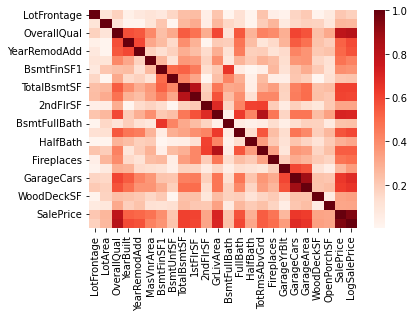

In [19]:
corrs=highcorr_num_df.corr().abs()
heatmap=sns.heatmap(corrs,cmap='Reds')